## Потеря разреженности
$L$ и $U$ факторы разреженной матрицы могут быть не разреженными

cond(A) =  1.0080019228077781


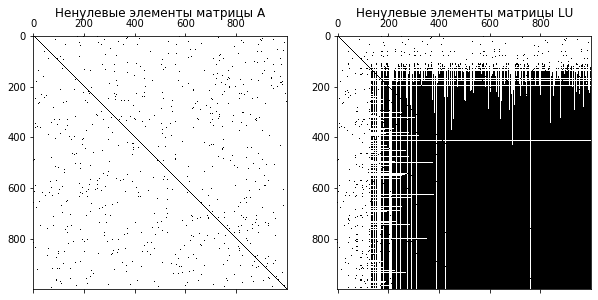

In [22]:
%matplotlib inline
import numpy as np
from scipy import sparse, linalg
from matplotlib import pyplot as plt

n = 1000
A = sparse.random(n, n, 0.01) + n*np.eye(n)
print('cond(A) = ', np.linalg.cond(A))
LU,piv = linalg.lu_factor(A)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.spy(A)
ax1.set_title('Ненулевые элементы матрицы A')
ax2.set_title('Ненулевые элементы матрицы LU')
ax2.spy(LU)

## Реализация метода Якоби для матрицы с диагональным преобладанием

In [23]:
# Метод Якоби
import numpy as np
n = 4
A = np.random.rand(n,n) + n * np.eye(n)
print(A)

[[4.14680577 0.62058119 0.75915562 0.59708098]
 [0.49712858 4.10265986 0.51099922 0.32944574]
 [0.30868588 0.12493645 4.20894505 0.77060946]
 [0.59713306 0.12360135 0.43935166 4.68284117]]


In [24]:
b = np.random.rand(n)
# Находим точное решение
x_ex = np.linalg.solve(A, b)
print(A @ x_ex - b)

[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00]


it =  14
||x - x_ex|| = 7.01e-07


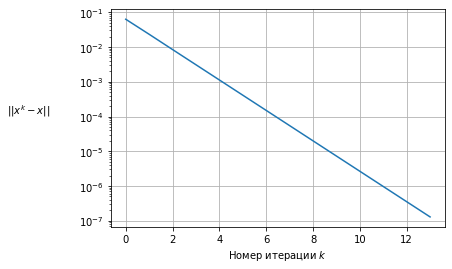

In [25]:
%matplotlib inline
import matplotlib 
from matplotlib import pyplot as plt

n = 4
A = np.random.rand(n,n) + n * np.eye(n)

b = np.random.rand(n)
# Находим точное решение
x_ex = np.linalg.solve(A, b)

xkp1 = np.zeros(n)
xk = np.zeros(n)
err = np.array([])
tol = 1e-6
it = 0
while (np.linalg.norm(A @ xkp1 - b) > tol):
    it += 1
    xk[:] = xkp1[:]
    for i in range(n):
        xkp1[i] = b[i]
        for j in range(n):
            if(i != j): 
                xkp1[i] = xkp1[i] - A[i,j] * xk[j]
        xkp1[i] = xkp1[i] / A[i,i]
    err = np.append(err, np.linalg.norm(xkp1 - x_ex))
print('it = ', it)
print('||x - x_ex|| = {0:5.2e}'.
      format(np.linalg.norm(xkp1 - x_ex)/np.linalg.norm(x_ex)))
fig, ax = plt.subplots()
ax.semilogy(err)
ax.set_ylabel(r'$||x^k - x||$', rotation = 0, labelpad = 50)
ax.set_xlabel(r'Номер итерации $k$')
ax.grid(True)

([], <a list of 0 Text xticklabel objects>)

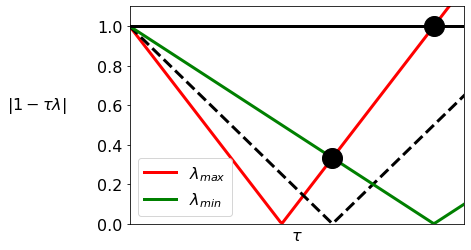

In [28]:
import matplotlib
# matplotlib.rcParams.update({'font.size': 30})
xx = np.linspace(0,1.25,200)
l = np.array([2, 1.5, 1.0])
plt.figure()
plt.plot(xx, np.abs(1 - xx * l[0]), 'r-', lw = 3, label = r'$\lambda_{max}$')
plt.plot(xx, np.abs(1 - xx * l[1]), 'k--', lw = 3)
plt.plot(xx, np.abs(1 - xx * l[2]), 'g-', lw = 3, label = r'$\lambda_{min}$')
plt.plot(xx, np.ones(200), 'k-', lw = 3)
plt.plot((2/3,1), (1/3, 1), 'ko', ms=20 )
plt.xlim(0,1.1)
plt.ylim(0, 1.1)
plt.legend()
plt.xlabel(r'$\tau$')
plt.ylabel(r'$|1 - \tau\lambda|$', rotation = 0, labelpad = 60)
# plt.annotate(r'$1 - \tau \lambda_{min} = \tau \lambda_{max} - 1$', (2/3, 1/3), xytext = (2/3 +0.1, 1/3 + 0.1))
plt.xticks([])
# plt.savefig('richardson-optimal.png', format = 'png', dpi = 300, bbox_inches = 'tight')

## Многочлены Чебышёва

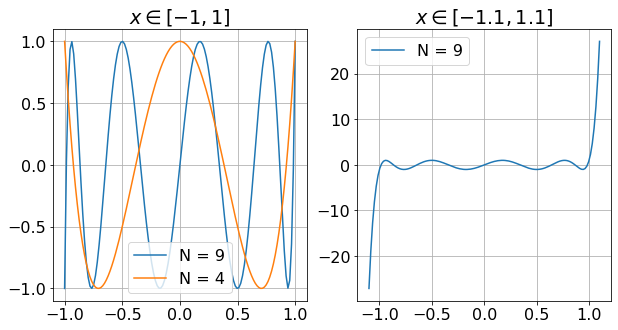

In [29]:
matplotlib.rcParams.update({'font.size': 16})
x1 = np.linspace(-1, 1, 128)
x2 = np.linspace(-1.1, 1.1, 128)
p9 = np.polynomial.Chebyshev((0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (-1, 1)) 
p4 = np.polynomial.Chebyshev((0, 0, 0, 0, 1), (-1, 1)) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(x1, p9(x1), label = 'N = 9')
ax1.plot(x1, p4(x1), label = 'N = 4')
ax1.set_title('$x\in[-1, 1]$')
ax1.legend()
ax2.plot(x2, p9(x2), label = 'N = 9')
ax2.legend()
ax2.set_title('$x\in[-1.1, 1.1]$')
ax1.grid(True)
ax2.grid(True)